In [1]:
# SQL Engine
import sqlalchemy as sa

db_path = r"C:\Users\rober\Documents\Python\bitcoin_gold_analysis\data\bitcoin_gold_database.db"
engine = sa.create_engine(f'sqlite:///{db_path}')

inspector = sa.inspect(engine)
print(f"Tables found: {inspector.get_table_names()}")

Tables found: ['macro_data', 'market_data_filled', 'market_data_sycned']


In [31]:
import pandas as pd

# Pull Daily Asset Data
df_cor_shift = pd.read_sql("SELECT Date, BTC_pct_chg, Gold_pct_chg FROM market_data_sycned", engine)
df_cor_shift['Date'] = pd.to_datetime(df_cor_shift['Date'])
df_cor_shift.sort_values('Date', inplace=True)

df_cor_shift.head()

,Date,BTC_pct_chg,Gold_pct_chg
0,2016-01-04,0.000000,0.000000
1,2016-01-05,-0.002611,0.003070
2,2016-01-06,-0.006609,0.012519
3,2016-01-07,0.067450,0.014470
4,2016-01-08,-0.010519,-0.008937


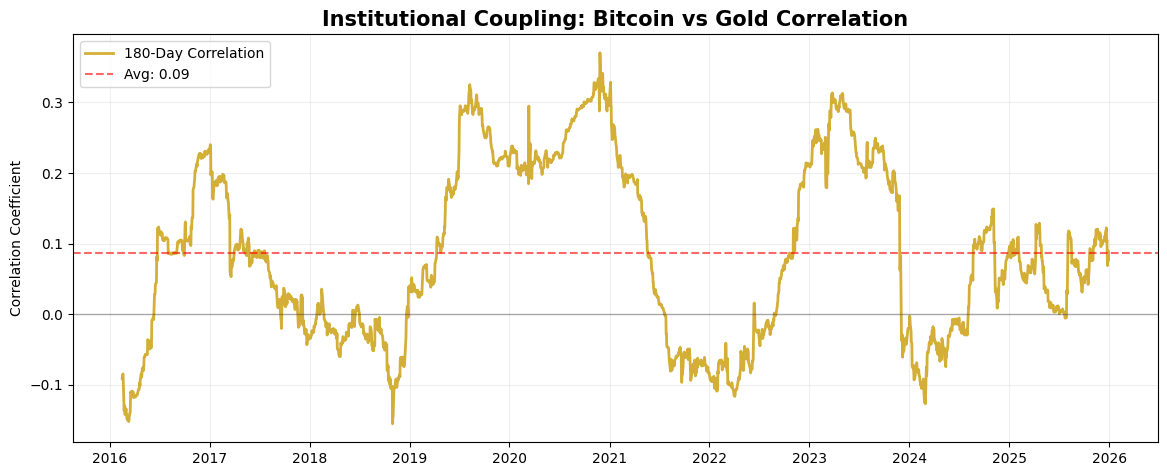

In [32]:
# Visualisation
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Create Daily Log Returns
df_cor_shift['BTC_Gold_Corr'] = df_cor_shift['BTC_pct_chg'].rolling(window=180, min_periods=30).corr(df_cor_shift['Gold_pct_chg'])

# Calculate Lifetime Average Correlation
lifetime_avg = df_cor_shift['BTC_Gold_Corr'].mean()

# Fix Dates on X-Axis
df_cor_shift['Date'] = pd.to_datetime(df_cor_shift['Date'])
df_cor_shift.set_index('Date', inplace=True)

# 2. Now we can safely extract the dates for Matplotlib
# (Using .index directly now works because it's a DatetimeIndex)
dates = df_cor_shift.index
values = df_cor_shift['BTC_Gold_Corr']
lifetime_avg = values.mean()

fig, ax = plt.subplots(figsize=(14, 6))

# 3. Plotting
ax.plot(dates, values, color='#D4AF37', lw=2, label='180-Day Correlation')
ax.axhline(lifetime_avg, color='red', linestyle='--', alpha=0.6, label=f'Avg: {lifetime_avg:.2f}')
ax.axhline(0, color='black', lw=1, alpha=0.3)

# 4. Year Formatting
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 5. Styling
plt.title('Institutional Coupling: Bitcoin vs Gold Correlation', fontsize=15, fontweight='bold')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.2)
plt.legend(loc='upper left')

# Auto-align the year labels
fig.autofmt_xdate(rotation=0, ha='center') 

plt.show()